In [177]:
# Import the liana library for ligand-receptor interaction analysis
import liana as li
import scanpy as sc
import anndata as ad
import numpy as np
from liana.method import cellphonedb
import pandas as pd
from liana.plotting import dotplot
import scipy


In [178]:
# Print the version of LIANA to confirm the installation and check compatibility
print(f"LIANA version: {li.__version__}")

LIANA version: 0.1.9


In [179]:
# Defining the base path to the directory containing single-cell RNA-seq data.
# Make sure to update this path according to your file system.
base_data_path = "/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/data"

In [180]:
# Display the available methods for ligand-receptor interaction analysis in LIANA
li.mt.show_methods()


Method Name Magnitude Score Specificity Score  \
0        CellPhoneDB        lr_means   cellphone_pvals   
0         Connectome       expr_prod     scaled_weight   
0             log2FC            None          lr_logfc   
0              NATMI       expr_prod       spec_weight   
0  SingleCellSignalR         lrscore              None   
0           CellChat        lr_probs    cellchat_pvals   
0     Rank_Aggregate  magnitude_rank  specificity_rank   
0     Geometric Mean       lr_gmeans       gmean_pvals   

                                           Reference  
0  Efremova, M., Vento-Tormo, M., Teichmann, S.A....  
0  Raredon, M.S.B., Yang, J., Garritano, J., Wang...  
0  Dimitrov, D., Türei, D., Garrido-Rodriguez, M....  
0  Hou, R., Denisenko, E., Ong, H.T., Ramilowski,...  
0  Cabello-Aguilar, S., Alame, M., Kon-Sun-Tack, ...  
0  Jin, S., Guerrero-Juarez, C.F., Zhang, L., Cha...  
0  Dimitrov, D., Türei, D., Garrido-Rodriguez, M....  
0  CellPhoneDBv2's permutation approach applied t...

In [181]:
# Display a description of the rank_aggregate function in liana
li.mt.cellphonedb.describe()


CellPhoneDB uses `lr_means` and `cellphone_pvals` as measures of expression strength and interaction specificity, respectively


In [182]:
# Load the AnnData object containing epithelial cell data with PLAUR status
epithelial_cells = sc.read_h5ad(f'{base_data_path}/epith_subset_plaur_status.h5ad')
epithelial_cells

AnnData object with n_obs × n_vars = 32568 × 26811
    obs: 'Sample', 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'cell_type', 'cnv_leiden', 'cnv_score', 'PLAUR_Status'
    var: 'n_cells', 'chromosome', 'start', 'end', 'gene_symbol'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_colors', 'cnv', 'cnv_leiden', 'cnv_leiden_colors', 'cnv_neighbors', 'dendrogram_cnv_leiden', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'over_clustering', 'pca', 'predicted_labels_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_cnv', 'X_cnv_pca', 'X_cnv_umap', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'cnv_neighbors_connectivities', 'cnv_neighbors_distances', 'con

In [183]:
epithelial_cells.obs

Sample  doublet  n_genes_by_counts  total_counts  \
AAACCCACAGACAAGC-1    Treated    False                227        1029.0   
AAACGAAGTCGTTTCC-1    Treated    False               3467       10423.0   
AAACGAATCCCAGGCA-1    Treated    False                223        4901.0   
AAACGAATCTTTCGAT-1    Treated    False                425        5078.0   
AAACGCTAGACTCTAC-1    Treated    False                295        3552.0   
...                       ...      ...                ...           ...   
TTTGGAGCAAGAGTAT-1  Untreated    False               5580       25738.0   
TTTGGTTAGTTGGAAT-1  Untreated    False               2047        5145.0   
TTTGGTTCACTACTTT-1  Untreated    False               2421        5729.0   
TTTGTTGGTACCCGCA-1  Untreated    False               3727       14103.0   
TTTGTTGGTTCTCACC-1  Untreated    False                545         709.0   

                    total_counts_mt  pct_counts_mt  total_counts_ribo  \
AAACCCACAGACAAGC-1             26.0       2.526725               51.0   
AAACGAAGTCGTTTCC-1            382.0       3.664972             1405.0   
AAACGAATCCCAGGCA-1              8.0       0.163232               45.0   
AAACGAATCTTTCGAT-1            142.0       2.796376               40.0   
AAACGCTAGACTCTAC-1             99.0       2.787162               38.0   
...                             ...            ...                ...   
TTTGGAGCAAGAGTAT-1           3076.0      11.951200             3552.0   
TTTGGTTAGTTGGAAT-1            400.0       7.774539              938.0   
TTTGGTTCACTACTTT-1            181.0       3.159365             1130.0   
TTTGTTGGTACCCGCA-1           1531.0      10.855846             2064.0   
TTTGTTGGTTCTCACC-1             25.0       3.526093               73.0   

                    pct_counts_ribo  n_genes  _scvi_batch  _scvi_labels  \
AAACCCACAGACAAGC-1         4.956268      227            0             0   
AAACGAAGTCGTTTCC-1        13.479805     3467            0             0   
AAACGAATCCCAGGCA-1         0.918180      223            0             0   
AAACGAATCTTTCGAT-1         0.787712      425            0             0   
AAACGCTAGACTCTAC-1         1.069820      295            0             0   
...                             ...      ...          ...           ...   
TTTGGAGCAAGAGTAT-1        13.800606     5580            0             0   
TTTGGTTAGTTGGAAT-1        18.231293     2047            0             0   
TTTGGTTCACTACTTT-1        19.724209     2421            0             0   
TTTGTTGGTACCCGCA-1        14.635184     3727            0             0   
TTTGTTGGTTCTCACC-1        10.296192      545            0             0   

                   leiden          predicted_labels over_clustering  \
AAACCCACAGACAAGC-1      6  Tcm/Naive helper T cells             100   
AAACGAAGTCGTTTCC-1      8               Fibroblasts              78   
AAACGAATCCCAGGCA-1      6  Tcm/Naive helper T cells             100   
AAACGAATCTTTCGAT-1      6            Late erythroid             100   
AAACGCTAGACTCTAC-1      6            Late erythroid             100   
...                   ...                       ...             ...   
TTTGGAGCAAGAGTAT-1      2          Epithelial cells               3   
TTTGGTTAGTTGGAAT-1      2          Epithelial cells               3   
TTTGGTTCACTACTTT-1      2          Epithelial cells             123   
TTTGTTGGTACCCGCA-1      2          Epithelial cells               3   
TTTGTTGGTTCTCACC-1      2                  NK cells             123   

                             majority_voting  conf_score            cell_type  \
AAACCCACAGACAAGC-1  Tcm/Naive helper T cells    0.241862      G6.Epithelial_4   
AAACGAAGTCGTTTCC-1               Fibroblasts    1.000000      G8.Epithelial_5   
AAACGAATCCCAGGCA-1  Tcm/Naive helper T cells    0.394339      G6.Epithelial_4   
AAACGAATCTTTCGAT-1  Tcm/Naive helper T cells    0.500927      G6.Epithelial_4   
AAACGCTAGACTCTAC-1  Tcm/Naive helper T cells    0.767740      G6.Epithelial_4   
...  

In [184]:
# Step 1: Define Target Cell Types
# Identify unique cell types in the dataset to select potential targets for analysis
available_cell_types = epithelial_cells.obs['cell_type'].unique()
print("Available cell types in the dataset:", available_cell_types)

Available cell types in the dataset: ['G6.Epithelial_4', 'G8.Epithelial_5', 'G5.Epithelial_3', 'G2.Epithelial_pro_1', 'G4.Epithelial_pro_2']
Categories (5, object): ['G2.Epithelial_pro_1', 'G4.Epithelial_pro_2', 'G5.Epithelial_3', 'G6.Epithelial_4', 'G8.Epithelial_5']


In [185]:
# Step 2: Extract PLAUR+ and PLAUR- Cells as Source
# Select cells labeled as PLAUR+ and PLAUR- and copy them into separate AnnData objects
plaured_positive_cells = epithelial_cells[epithelial_cells.obs['PLAUR_Status'] == 'PLAUR+'].copy()
plaured_negative_cells = epithelial_cells[epithelial_cells.obs['PLAUR_Status'] == 'PLAUR-'].copy()
# Debug: Check the number of cells in each group
print(f"Number of PLAUR+ cells: {plaured_positive_cells.shape[0]}")
print(f"Number of PLAUR- cells: {plaured_negative_cells.shape[0]}")

Number of PLAUR+ cells: 3257
Number of PLAUR- cells: 3257


In [186]:
# Check if the observation names (obs_names) are unique in the AnnData objects
# for both PLAUR+ (positive) and PLAUR- (negative) cells.

# For PLAUR+ cells, this will return True if all observation names are unique,
# otherwise, it returns False.
is_positive_unique = plaured_positive_cells.obs_names.is_unique

# For PLAUR- cells, this will return True if all observation names are unique,
# otherwise, it returns False.
is_negative_unique = plaured_negative_cells.obs_names.is_unique

# Print the results to verify uniqueness for both sets of cells
print("PLAUR+ cells have unique obs_names:", is_positive_unique)
print("PLAUR- cells have unique obs_names:", is_negative_unique)


PLAUR+ cells have unique obs_names: True
PLAUR- cells have unique obs_names: True


In [187]:
# Step 3: Extract Specific Target Cells
# Select cells from specific target cell types for interaction analysis
target_cell_types = ["G5.Epithelial_3", "G8.Epithelial_5", "G2.Epithelial_pro_1"]
target_cells = epithelial_cells[epithelial_cells.obs['cell_type'].isin(target_cell_types)].copy()

In [188]:
# Check if the observation names (obs_names) are unique in the target_cells AnnData object.
# This ensures that each cell in the target group has a unique identifier.

# The is_unique attribute returns True if all observation names are unique,
# otherwise, it returns False.
is_target_unique = target_cells.obs_names.is_unique

# Print the result to verify uniqueness in the target_cells dataset
print("Target cells have unique obs_names:", is_target_unique)


Target cells have unique obs_names: True


In [189]:
# Concatenate the AnnData objects for PLAUR+ cells, PLAUR- cells, and target cells.
# This combines all three datasets into one AnnData object along the observation (cell) axis.
# Ensuring that each observation (cell) has a unique name is crucial to avoid conflicts.

combined_cells = ad.concat([plaured_positive_cells, plaured_negative_cells, target_cells], axis=0)


# After concatenation, check if all observation names in the combined AnnData object are unique.
# This is necessary because non-unique names can lead to errors in downstream analyses.
is_combined_unique = combined_cells.obs_names.is_unique

# Print the result to confirm if the combined dataset has unique observation names
print("Combined cells have unique obs_names:", is_combined_unique)


Combined cells have unique obs_names: False


/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/liana_env/lib/python3.12/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/liana_env/lib/python3.12/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [190]:
#Ensure that observation names are unique in the combined AnnData object
# This function appends suffixes to any duplicate observation names to ensure uniqueness
combined_cells.obs_names_make_unique()

/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/liana_env/lib/python3.12/site-packages/anndata/utils.py:261: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['AGGAATAAGCACTCTA-1-1', 'GGTTCTCAGACTCGAG-1-1', 'CAATTTCAGAGGATCC-1-1', 'TGCACGGCATATGGCT-1-1', 'ATGTCCCGTGAATTAG-1-1']


In [191]:
# After concatenation, check if all observation names in the combined AnnData object are unique.
# This is necessary because non-unique names can lead to errors in downstream analyses.
is_combined_unique = combined_cells.obs_names.is_unique

# Print the result to confirm if the combined dataset has unique observation names
print("Combined cells have unique obs_names:", is_combined_unique)

Combined cells have unique obs_names: True


In [192]:
combined_cells.obs

Sample  doublet  n_genes_by_counts  total_counts  \
ACCTGTCCACAAAGTA-1    Treated    False                866        1629.0   
ACTATCTAGTGTTCAC-1    Treated    False               2230        7983.0   
AGGAGGTGTGAAGCTG-1    Treated    False               3247       12608.0   
ATGAGGGTCCGTTGAA-1    Treated    False               3311       11167.0   
ATTCCATGTCCACAGC-1    Treated    False                780        1457.0   
...                       ...      ...                ...           ...   
TTTGGAGCAAGAGTAT-1  Untreated    False               5580       25738.0   
TTTGGTTAGTTGGAAT-1  Untreated    False               2047        5145.0   
TTTGGTTCACTACTTT-1  Untreated    False               2421        5729.0   
TTTGTTGGTACCCGCA-1  Untreated    False               3727       14103.0   
TTTGTTGGTTCTCACC-1  Untreated    False                545         709.0   

                    total_counts_mt  pct_counts_mt  total_counts_ribo  \
ACCTGTCCACAAAGTA-1            180.0      11.049724               59.0   
ACTATCTAGTGTTCAC-1            478.0       5.987724             1291.0   
AGGAGGTGTGAAGCTG-1            103.0       0.816942              626.0   
ATGAGGGTCCGTTGAA-1            572.0       5.122235             1426.0   
ATTCCATGTCCACAGC-1            184.0      12.628690               48.0   
...                             ...            ...                ...   
TTTGGAGCAAGAGTAT-1           3076.0      11.951200             3552.0   
TTTGGTTAGTTGGAAT-1            400.0       7.774539              938.0   
TTTGGTTCACTACTTT-1            181.0       3.159365             1130.0   
TTTGTTGGTACCCGCA-1           1531.0      10.855846             2064.0   
TTTGTTGGTTCTCACC-1             25.0       3.526093               73.0   

                    pct_counts_ribo  n_genes  _scvi_batch  _scvi_labels  \
ACCTGTCCACAAAGTA-1         3.621854      866            0             0   
ACTATCTAGTGTTCAC-1        16.171865     2230            0             0   
AGGAGGTGTGAAGCTG-1         4.965102     3247            0             0   
ATGAGGGTCCGTTGAA-1        12.769768     3311            0             0   
ATTCCATGTCCACAGC-1         3.294441      780            0             0   
...                             ...      ...          ...           ...   
TTTGGAGCAAGAGTAT-1        13.800606     5580            0             0   
TTTGGTTAGTTGGAAT-1        18.231293     2047            0             0   
TTTGGTTCACTACTTT-1        19.724209     2421            0             0   
TTTGTTGGTACCCGCA-1        14.635184     3727            0             0   
TTTGTTGGTTCTCACC-1        10.296192      545            0             0   

                   leiden  predicted_labels over_clustering   majority_voting  \
ACCTGTCCACAAAGTA-1      5  Epithelial cells             264  Epithelial cells   
ACTATCTAGTGTTCAC-1      8  Epithelial cells              27  Epithelial cells   
AGGAGGTGTGAAGCTG-1      5  Epithelial cells             173  Epithelial cells   
ATGAGGGTCCGTTGAA-1      8  Epithelial cells              27  Epithelial cells   
ATTCCATGTCCACAGC-1      5  Epithelial cells             264  Epithelial cells   
...                   ...               ...             ...               ...   
TTTGGAGCAAGAGTAT-1      2  Epithelial cells               3  Epithelial cells   
TTTGGTTAGTTGGAAT-1      2  Epithelial cells               3  Epithelial cells   
TTTGGTTCACTACTTT-1      2  Epithelial cells             123  Epithelial cells   
TTTGTTGGTACCCGCA-1      2  Epithelial cells               3  Epithelial cells   
TTTGTTGGTTCTCACC-1      2          NK cells             123  Epithelial cells   

                    conf_score            cell_type cnv_leiden  cnv_score  \
ACCTGTCCACAAAGTA-1    0.190555      G5.Epithelial_3          3   0.007215   
ACTATCTAGTGTTCAC-1    1.000000      G8.Epithelial_5         20   0.014413   
AGGAGGTGTGAAGCTG-1    0.999999      G5.Epithelial_3         20   0.014413   
ATGAGGGTCCGTTGAA-1    1.000000      G8.Epithelial_5         20 

In [193]:
# Define a new column 'liana_group' in the combined_cells AnnData object to label cells
# as either 'Source' or 'Target' based on their PLAUR status.

combined_cells.obs['liana_group'] = np.where(
    # Check if the 'PLAUR_Status' column in the observations contains 'PLAUR+' or 'PLAUR-'.
    # If it does, label these cells as 'Source'.
    combined_cells.obs['PLAUR_Status'].isin(['PLAUR+', 'PLAUR-']),
    
    # If the condition is True (PLAUR+ or PLAUR-), assign the label 'Source'.
    'Source',
    
    # If the condition is False (i.e., not PLAUR+ or PLAUR-), assign the label 'Target'.
    'Target'
)


In [194]:
# Step 1: Normalize the AnnData object if not already done (e.g., normalize and log-transform)
# This step is optional if the data is already normalized
combined_cells.X = np.nan_to_num(combined_cells.X, nan=0.0, posinf=0.0, neginf=0.0)
combined_cells.raw = combined_cells  # Save raw data if you want to preserve it

In [195]:
combined_cells.obs 

Sample  doublet  n_genes_by_counts  total_counts  \
ACCTGTCCACAAAGTA-1    Treated    False                866        1629.0   
ACTATCTAGTGTTCAC-1    Treated    False               2230        7983.0   
AGGAGGTGTGAAGCTG-1    Treated    False               3247       12608.0   
ATGAGGGTCCGTTGAA-1    Treated    False               3311       11167.0   
ATTCCATGTCCACAGC-1    Treated    False                780        1457.0   
...                       ...      ...                ...           ...   
TTTGGAGCAAGAGTAT-1  Untreated    False               5580       25738.0   
TTTGGTTAGTTGGAAT-1  Untreated    False               2047        5145.0   
TTTGGTTCACTACTTT-1  Untreated    False               2421        5729.0   
TTTGTTGGTACCCGCA-1  Untreated    False               3727       14103.0   
TTTGTTGGTTCTCACC-1  Untreated    False                545         709.0   

                    total_counts_mt  pct_counts_mt  total_counts_ribo  \
ACCTGTCCACAAAGTA-1            180.0      11.049724               59.0   
ACTATCTAGTGTTCAC-1            478.0       5.987724             1291.0   
AGGAGGTGTGAAGCTG-1            103.0       0.816942              626.0   
ATGAGGGTCCGTTGAA-1            572.0       5.122235             1426.0   
ATTCCATGTCCACAGC-1            184.0      12.628690               48.0   
...                             ...            ...                ...   
TTTGGAGCAAGAGTAT-1           3076.0      11.951200             3552.0   
TTTGGTTAGTTGGAAT-1            400.0       7.774539              938.0   
TTTGGTTCACTACTTT-1            181.0       3.159365             1130.0   
TTTGTTGGTACCCGCA-1           1531.0      10.855846             2064.0   
TTTGTTGGTTCTCACC-1             25.0       3.526093               73.0   

                    pct_counts_ribo  n_genes  _scvi_batch  ...  leiden  \
ACCTGTCCACAAAGTA-1         3.621854      866            0  ...       5   
ACTATCTAGTGTTCAC-1        16.171865     2230            0  ...       8   
AGGAGGTGTGAAGCTG-1         4.965102     3247            0  ...       5   
ATGAGGGTCCGTTGAA-1        12.769768     3311            0  ...       8   
ATTCCATGTCCACAGC-1         3.294441      780            0  ...       5   
...                             ...      ...          ...  ...     ...   
TTTGGAGCAAGAGTAT-1        13.800606     5580            0  ...       2   
TTTGGTTAGTTGGAAT-1        18.231293     2047            0  ...       2   
TTTGGTTCACTACTTT-1        19.724209     2421            0  ...       2   
TTTGTTGGTACCCGCA-1        14.635184     3727            0  ...       2   
TTTGTTGGTTCTCACC-1        10.296192      545            0  ...       2   

                    predicted_labels over_clustering   majority_voting  \
ACCTGTCCACAAAGTA-1  Epithelial cells             264  Epithelial cells   
ACTATCTAGTGTTCAC-1  Epithelial cells              27  Epithelial cells   
AGGAGGTGTGAAGCTG-1  Epithelial cells             173  Epithelial cells   
ATGAGGGTCCGTTGAA-1  Epithelial cells              27  Epithelial cells   
ATTCCATGTCCACAGC-1  Epithelial cells             264  Epithelial cells   
...                              ...             ...               ...   
TTTGGAGCAAGAGTAT-1  Epithelial cells               3  Epithelial cells   
TTTGGTTAGTTGGAAT-1  Epithelial cells               3  Epithelial cells   
TTTGGTTCACTACTTT-1  Epithelial cells             123  Epithelial cells   
TTTGTTGGTACCCGCA-1  Epithelial cells               3  Epithelial cells   
TTTGTTGGTTCTCACC-1          NK cells             123  Epithelial cells   

                   conf_score            cell_type cnv_leiden cnv_score  \
ACCTGTCCACAAAGTA-1   0.190555      G5.Epithelial_3          3  0.007215   
ACTATCTAGTGTTCAC-1   1.000000      G8.Epithelial_5         20  0.014413   
AGGAGGTGTGAAGCTG-1   0.999999      G5.Epithelial_3         20  0.014413   
ATGAGGGTCCGTTGAA-1   1.000000      G8.Epithelial_5         20  0.014413   
ATTCCATGTCCACAGC-1   0.022292      G5.Epithelial_3          9  0.006423   
...              

In [196]:
# # Step 2: Run LIANA’s CellPhoneDB-like method
# # Ensure you have a column with cell types in combined_cells.obs, such as 'cell_type'
# combined_cells.obs['cell_type'] = combined_cells.obs['liana_group']  # Adjust if 'liana_group' is not your cell type column


In [197]:
# Ensure the 'cell_type' column is set as a categorical dtype
combined_cells.obs['cell_type'] = combined_cells.obs['cell_type'].astype('category')

In [198]:
# Step 6: Normalization for LIANA
print("Normalizing data...")
sc.pp.normalize_total(combined_cells, target_sum=1e4)
sc.pp.log1p(combined_cells)

Normalizing data...


In [199]:
# Ensure that the 'liana_group' column is of categorical type
combined_cells.obs['liana_group'] = combined_cells.obs['liana_group'].astype('category')

In [200]:
# Display a summary of the .obs DataFrame, including column names, data types, and memory usage
combined_cells.obs.info()


<class 'pandas.core.frame.DataFrame'>
Index: 26435 entries, ACCTGTCCACAAAGTA-1 to TTTGTTGGTTCTCACC-1
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Sample             26435 non-null  category
 1   doublet            26435 non-null  bool    
 2   n_genes_by_counts  26435 non-null  int64   
 3   total_counts       26435 non-null  float32 
 4   total_counts_mt    26435 non-null  float32 
 5   pct_counts_mt      26435 non-null  float32 
 6   total_counts_ribo  26435 non-null  float32 
 7   pct_counts_ribo    26435 non-null  float32 
 8   n_genes            26435 non-null  int64   
 9   _scvi_batch        26435 non-null  int8    
 10  _scvi_labels       26435 non-null  int8    
 11  leiden             26435 non-null  category
 12  predicted_labels   26435 non-null  category
 13  over_clustering    26435 non-null  category
 14  majority_voting    26435 non-null  category
 15  conf_score         26435 non

In [201]:
# Display the first few rows of combined_cells.obs to see a preview of the observations (cells)
combined_cells.obs


Sample  doublet  n_genes_by_counts  total_counts  \
ACCTGTCCACAAAGTA-1    Treated    False                866        1629.0   
ACTATCTAGTGTTCAC-1    Treated    False               2230        7983.0   
AGGAGGTGTGAAGCTG-1    Treated    False               3247       12608.0   
ATGAGGGTCCGTTGAA-1    Treated    False               3311       11167.0   
ATTCCATGTCCACAGC-1    Treated    False                780        1457.0   
...                       ...      ...                ...           ...   
TTTGGAGCAAGAGTAT-1  Untreated    False               5580       25738.0   
TTTGGTTAGTTGGAAT-1  Untreated    False               2047        5145.0   
TTTGGTTCACTACTTT-1  Untreated    False               2421        5729.0   
TTTGTTGGTACCCGCA-1  Untreated    False               3727       14103.0   
TTTGTTGGTTCTCACC-1  Untreated    False                545         709.0   

                    total_counts_mt  pct_counts_mt  total_counts_ribo  \
ACCTGTCCACAAAGTA-1            180.0      11.049724               59.0   
ACTATCTAGTGTTCAC-1            478.0       5.987724             1291.0   
AGGAGGTGTGAAGCTG-1            103.0       0.816942              626.0   
ATGAGGGTCCGTTGAA-1            572.0       5.122235             1426.0   
ATTCCATGTCCACAGC-1            184.0      12.628690               48.0   
...                             ...            ...                ...   
TTTGGAGCAAGAGTAT-1           3076.0      11.951200             3552.0   
TTTGGTTAGTTGGAAT-1            400.0       7.774539              938.0   
TTTGGTTCACTACTTT-1            181.0       3.159365             1130.0   
TTTGTTGGTACCCGCA-1           1531.0      10.855846             2064.0   
TTTGTTGGTTCTCACC-1             25.0       3.526093               73.0   

                    pct_counts_ribo  n_genes  _scvi_batch  ...  leiden  \
ACCTGTCCACAAAGTA-1         3.621854      866            0  ...       5   
ACTATCTAGTGTTCAC-1        16.171865     2230            0  ...       8   
AGGAGGTGTGAAGCTG-1         4.965102     3247            0  ...       5   
ATGAGGGTCCGTTGAA-1        12.769768     3311            0  ...       8   
ATTCCATGTCCACAGC-1         3.294441      780            0  ...       5   
...                             ...      ...          ...  ...     ...   
TTTGGAGCAAGAGTAT-1        13.800606     5580            0  ...       2   
TTTGGTTAGTTGGAAT-1        18.231293     2047            0  ...       2   
TTTGGTTCACTACTTT-1        19.724209     2421            0  ...       2   
TTTGTTGGTACCCGCA-1        14.635184     3727            0  ...       2   
TTTGTTGGTTCTCACC-1        10.296192      545            0  ...       2   

                    predicted_labels over_clustering   majority_voting  \
ACCTGTCCACAAAGTA-1  Epithelial cells             264  Epithelial cells   
ACTATCTAGTGTTCAC-1  Epithelial cells              27  Epithelial cells   
AGGAGGTGTGAAGCTG-1  Epithelial cells             173  Epithelial cells   
ATGAGGGTCCGTTGAA-1  Epithelial cells              27  Epithelial cells   
ATTCCATGTCCACAGC-1  Epithelial cells             264  Epithelial cells   
...                              ...             ...               ...   
TTTGGAGCAAGAGTAT-1  Epithelial cells               3  Epithelial cells   
TTTGGTTAGTTGGAAT-1  Epithelial cells               3  Epithelial cells   
TTTGGTTCACTACTTT-1  Epithelial cells             123  Epithelial cells   
TTTGTTGGTACCCGCA-1  Epithelial cells               3  Epithelial cells   
TTTGTTGGTTCTCACC-1          NK cells             123  Epithelial cells   

                   conf_score            cell_type cnv_leiden cnv_score  \
ACCTGTCCACAAAGTA-1   0.190555      G5.Epithelial_3          3  0.007215   
ACTATCTAGTGTTCAC-1   1.000000      G8.Epithelial_5         20  0.014413   
AGGAGGTGTGAAGCTG-1   0.999999      G5.Epithelial_3         20  0.014413   
ATGAGGGTCCGTTGAA-1   1.000000      G8.Epithelial_5         20  0.014413   
ATTCCATGTCCACAGC-1   0.022292      G5.Epithelial_3          9  0.006423   
...              

In [202]:
# Run LIANA’s CellPhoneDB method
# Ensure you have a column in `combined_cells.obs` that specifies the cell types, e.g., 'cell_type'
# This example uses 'consensus' as the resource for human gene symbols

cellphonedb(
    adata=combined_cells,
    groupby='PLAUR_Status',           # Replace 'PLAUR_Status' with the column specifying cell types in `obs`
    resource_name='consensus',     # Use 'consensus' for human gene symbols
    expr_prop=0.1,                 # Minimum proportion of cells expressing ligand/receptor for filtering
    verbose=True, 
    key_added='cpdb_res'           # Key where results will be stored in `adata.uns`
)

# Display top results
print("Top interactions found by LIANA’s CellPhoneDB method:")
combined_cells.uns['cpdb_res'].head()

Using `.raw`!
222 features of mat are empty, they will be removed.


/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/liana_env/lib/python3.12/site-packages/anndata/_core/anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/liana_env/lib/python3.12/site-packages/pandas/core/indexing.py:1857: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/liana_env/lib/python3.12/site-packages/liana/method/_pipe_utils/_pre.py:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


0.09 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 26435 samples and 26589 features


100%|██████████| 1000/1000 [00:18<00:00, 54.29it/s]


Top interactions found by LIANA’s CellPhoneDB method:


ligand ligand_complex  ligand_means  ligand_props receptor  \
2045  HLA-A          HLA-A      2.302674      0.952859    APLP2   
2408  TIMP1          TIMP1      1.932282      0.866433     CD63   
1522  HLA-A          HLA-A      2.043148      0.847377    APLP2   
2211  LAMB3          LAMB3      2.199344      0.917586    ITGA6   
822   TIMP1          TIMP1      1.932282      0.866433     CD63   

     receptor_complex  receptor_means  receptor_props        source  \
2045            APLP2        2.076381        0.911735        PLAUR+   
2408             CD63        2.342303        0.947509        PLAUR+   
1522            APLP2        2.076381        0.911735  Intermediate   
2211      ITGA6_ITGB1        1.883478        0.853728        PLAUR+   
822              CD63        2.114960        0.857298        PLAUR+   

            target  lr_means  cellphone_pvals  
2045        PLAUR+  2.189528              0.0  
2408        PLAUR+  2.137293              0.0  
1522        PLAUR+  2.059765              0.0  
2211        PLAUR+  2.041411              0.0  
822   Intermediate  2.023621              0.0

In [203]:
# Display top results
cpdb_res_df = pd.DataFrame(combined_cells.uns['cpdb_res'])
print("Top interactions found by LIANA’s CellPhoneDB method:")
cpdb_res_df

Top interactions found by LIANA’s CellPhoneDB method:


ligand ligand_complex  ligand_means  ligand_props receptor  \
2045   HLA-A          HLA-A      2.302674      0.952859    APLP2   
2408   TIMP1          TIMP1      1.932282      0.866433     CD63   
1522   HLA-A          HLA-A      2.043148      0.847377    APLP2   
2211   LAMB3          LAMB3      2.199344      0.917586    ITGA6   
822    TIMP1          TIMP1      1.932282      0.866433     CD63   
...      ...            ...           ...           ...      ...   
4668  IL15RA         IL15RA      0.132954      0.110511      AXL   
1956    TGS1           TGS1      0.147104      0.100503     RXRA   
4794  PTDSS1         PTDSS1      0.169607      0.145546    JMJD6   
4797    FADD           FADD      0.125035      0.124281      FAS   
4367   LAMA5          LAMA5      0.124868      0.117483     BCAM   

     receptor_complex  receptor_means  receptor_props        source  \
2045            APLP2        2.076381        0.911735        PLAUR+   
2408             CD63        2.342303        0.947509        PLAUR+   
1522            APLP2        2.076381        0.911735  Intermediate   
2211      ITGA6_ITGB1        1.883478        0.853728        PLAUR+   
822              CD63        2.114960        0.857298        PLAUR+   
...               ...             ...             ...           ...   
4668              AXL        0.177108        0.101795        PLAUR-   
1956             RXRA        0.157182        0.115513  Intermediate   
4794            JMJD6        0.122106        0.108245        PLAUR-   
4797              FAS        0.164251        0.127244        PLAUR-   
4367             BCAM        0.147248        0.113823        PLAUR-   

            target  lr_means  cellphone_pvals  
2045        PLAUR+  2.189528            0.000  
2408        PLAUR+  2.137293            0.000  
1522        PLAUR+  2.059765            0.000  
2211        PLAUR+  2.041411            0.000  
822   Intermediate  2.023621            0.000  
...            ...       ...              ...  
4668        PLAUR-  0.155031            0.000  
1956        PLAUR+  0.152143            0.332  
4794        PLAUR-  0.145857            1.000  
4797        PLAUR-  0.144643            0.000  
4367        PLAUR-  0.136058            1.000  

[4041 rows x 12 columns]

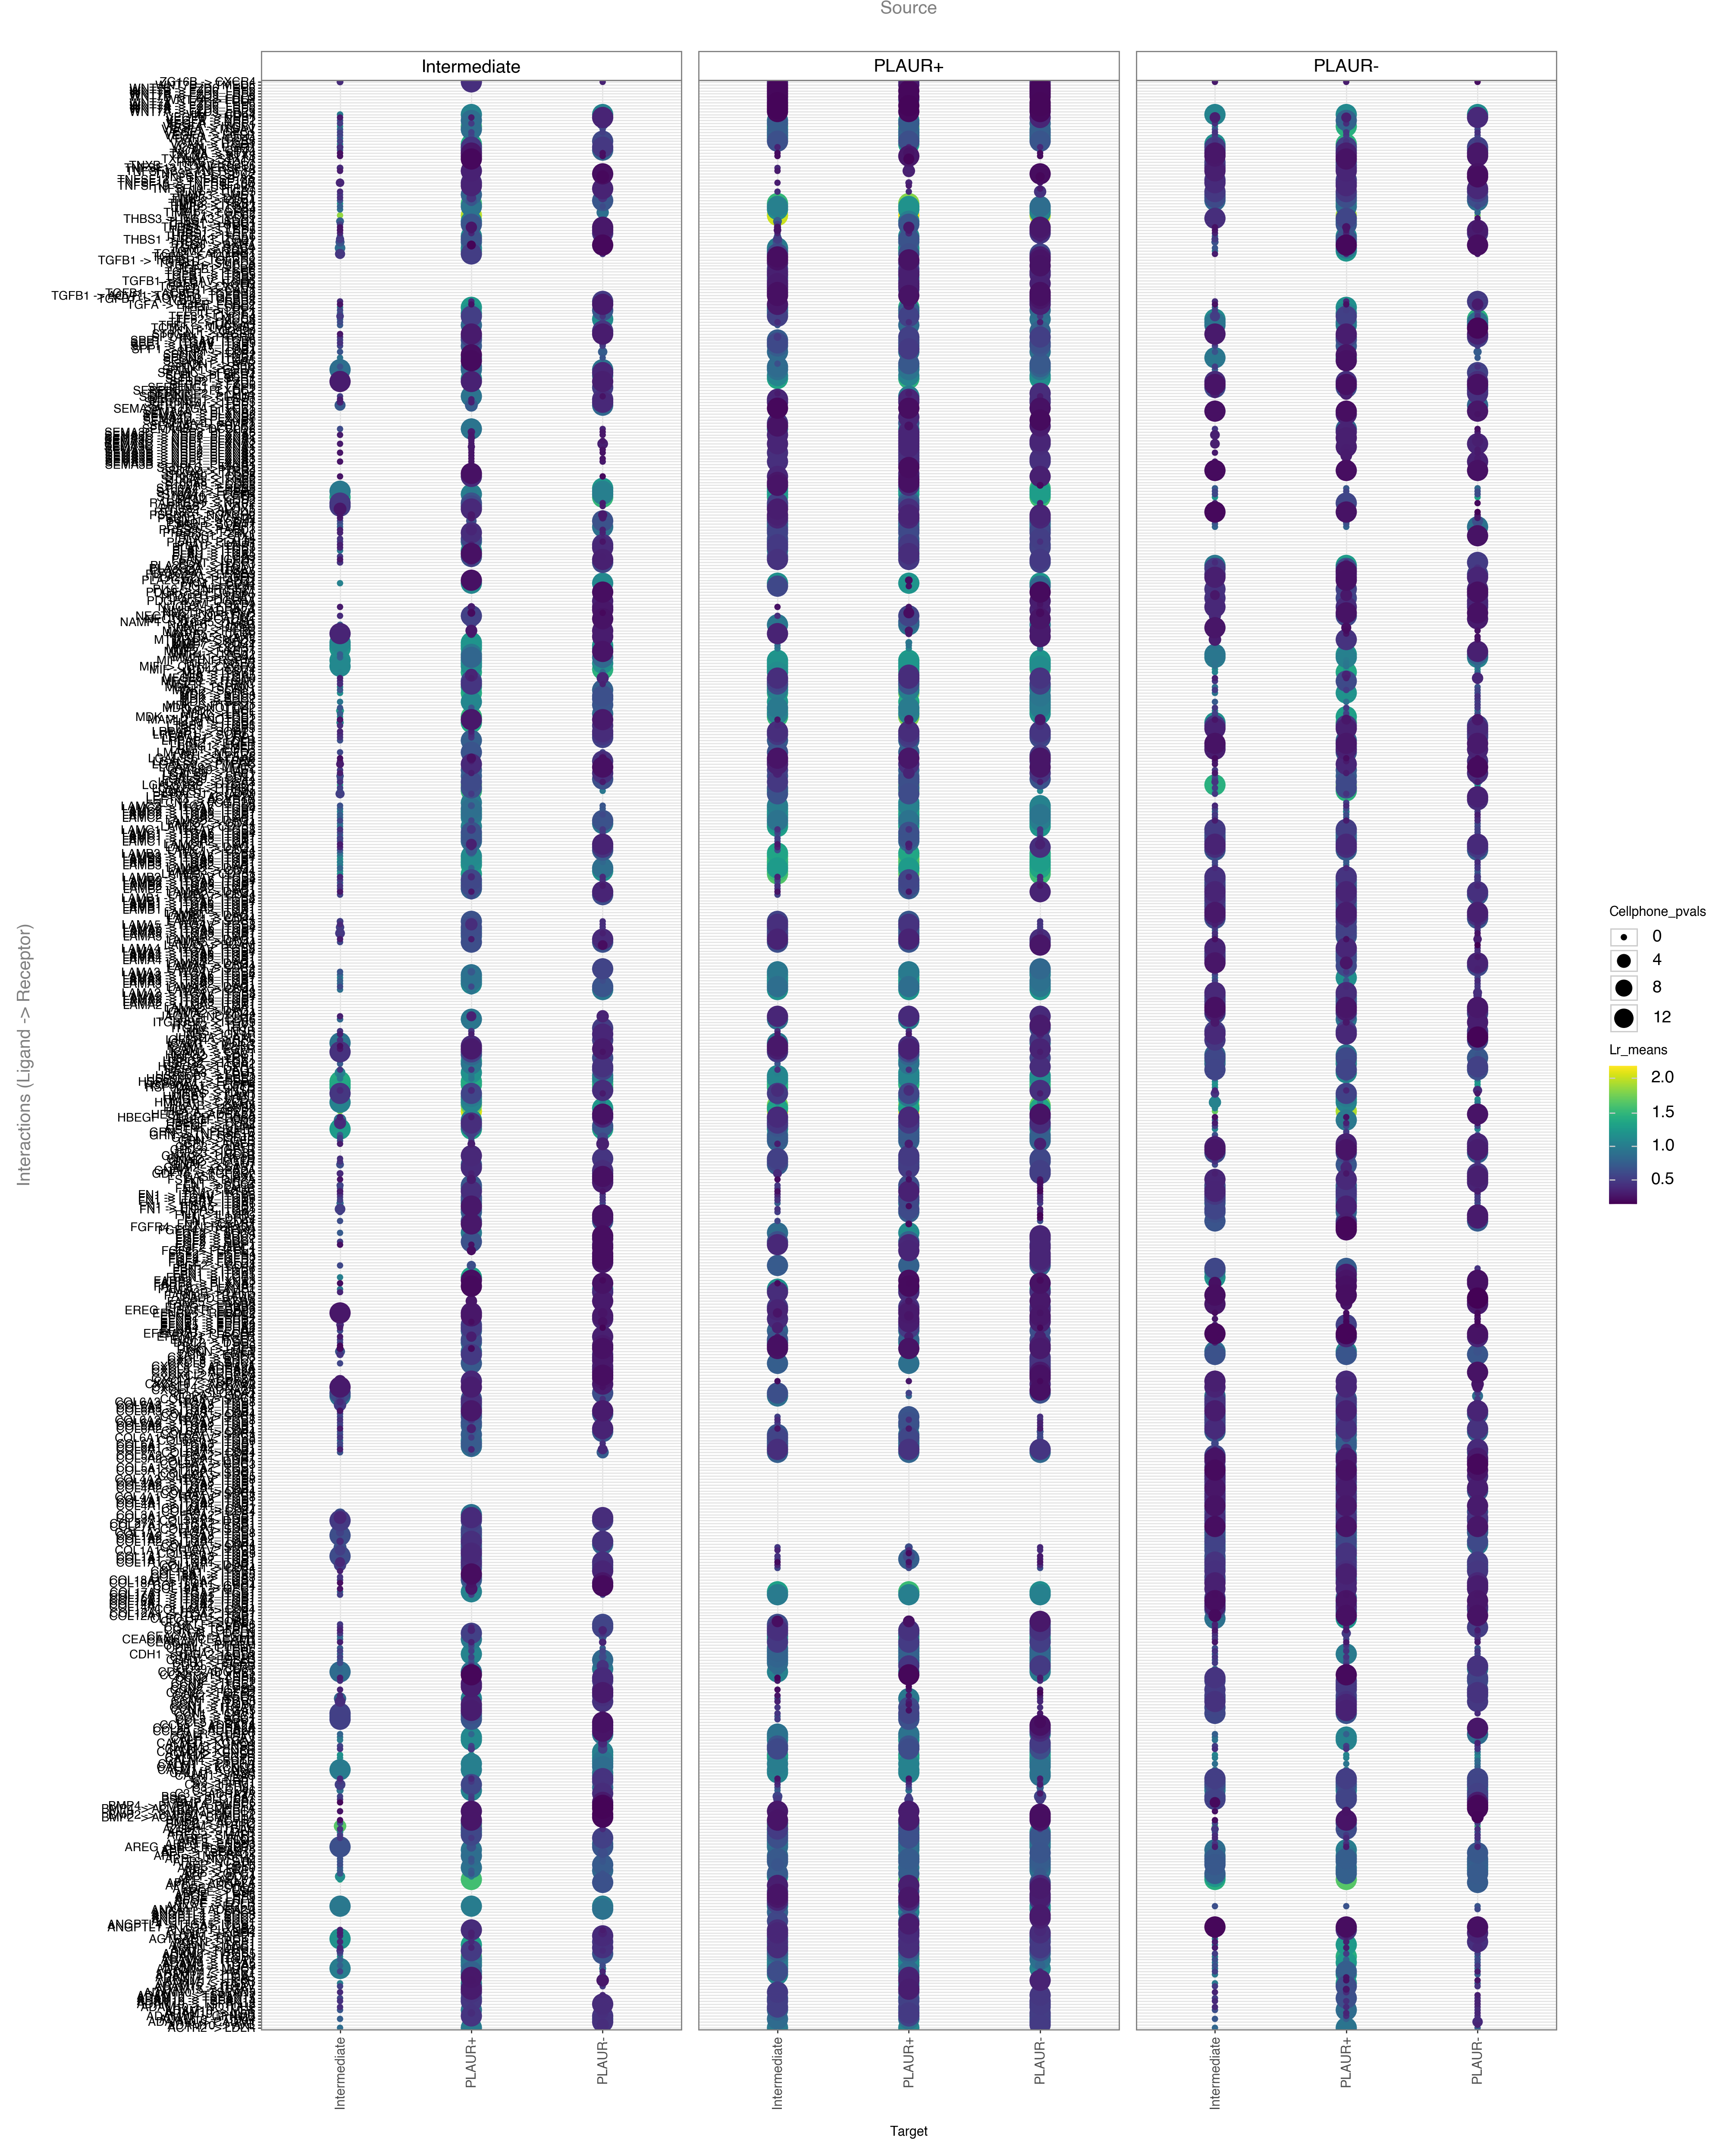

In [204]:
# Generate a dotplot for significant ligand-receptor interactions with adjusted spacing for clarity
dotplot(
    adata=combined_cells,
    colour='lr_means',                          # Color dots by the mean expression of ligand-receptor pairs
    size='cellphone_pvals',                      # Dot size based on p-values
    inverse_size=True,                           # Inverse p-values so that smaller p-values have larger dots
    source_labels=list(cpdb_res_df['source'].unique()),    # Source cell type labels
    target_labels= list(cpdb_res_df['target'].unique()),     # Target cell type labels
    figure_size=(20, 25),                        # Increased figure size for better spacing
    uns_key='cpdb_res',                          # Key in `adata.uns` where CellPhoneDB results are stored
    filterby='cellphone_pvals',                  # Filter by p-values column
    filter_lambda=lambda x: x <= 0.05,           # Show only interactions with p-values <= 0.05
                            
)


In [205]:
# Ensure that the 'doublet' column is of categorical type
combined_cells.obs['doublet'] = combined_cells.obs['doublet'].astype('int')

In [207]:
combined_cells.obs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26435 entries, ACCTGTCCACAAAGTA-1 to TTTGTTGGTTCTCACC-1
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Sample             26435 non-null  category
 1   doublet            26435 non-null  int64   
 2   n_genes_by_counts  26435 non-null  int64   
 3   total_counts       26435 non-null  float32 
 4   total_counts_mt    26435 non-null  float32 
 5   pct_counts_mt      26435 non-null  float32 
 6   total_counts_ribo  26435 non-null  float32 
 7   pct_counts_ribo    26435 non-null  float32 
 8   n_genes            26435 non-null  int64   
 9   _scvi_batch        26435 non-null  int8    
 10  _scvi_labels       26435 non-null  int8    
 11  leiden             26435 non-null  category
 12  predicted_labels   26435 non-null  category
 13  over_clustering    26435 non-null  category
 14  majority_voting    26435 non-null  category
 15  conf_score         26435 non

In [211]:
# Extract PLAUR expression as a dense array from the epithelial_cells object
new_combined_cells = epithelial_cells[:, 'PLAUR'].X

# Convert to a dense array if it’s sparse
if scipy.sparse.issparse(new_combined_cells):
    new_combined_cells = new_combined_cells.toarray().flatten()
else:
    new_combined_cells = new_combined_cells.flatten()

In [213]:
new_combined_cells

array([0.       , 0.       , 0.       , ..., 0.       , 1.2499723,
       0.       ], dtype=float32)

In [214]:
# Define quantile thresholds for high and low PLAUR expression
# Calculate the 10th percentile as the low threshold for PLAUR expression
low_threshold = np.percentile(new_combined_cells, 10)

# Calculate the 90th percentile as the high threshold for PLAUR expression
high_threshold = np.percentile(new_combined_cells ,90)


In [215]:
# Create a new column in .obs for PLAUR status based on the quantile thresholds
# Assign "PLAUR+" if expression is above the high threshold, "PLAUR-" if below the low threshold, 
# and "Intermediate" for expression levels in between
epithelial_cells.obs['PLAUR_Status'] = np.where(
    new_combined_cells >= high_threshold, 'PLAUR+',    # High PLAUR expression labeled as "PLAUR+"
    np.where(new_combined_cells <= low_threshold, 'PLAUR-', 'Intermediate')  # Low PLAUR as "PLAUR-", others as "Intermediate"
)


In [217]:
# Step 1.2: Filter out 'Intermediate' cells
# Retain only cells categorized as 'PLAUR+' or 'PLAUR-' in the 'PLAUR_Status' column
# .isin() checks if each entry in 'PLAUR_Status' is either 'PLAUR+' or 'PLAUR-'
filtered_cells = epithelial_cells[epithelial_cells.obs['PLAUR_Status'].isin(['PLAUR+', 'PLAUR-'])].copy()


In [219]:
# Step 1.3: Ensure that 'PLAUR_Status' is a categorical variable
# Convert the 'PLAUR_Status' column to a categorical type for optimized storage and processing
filtered_cells.obs['PLAUR_Status'] = filtered_cells.obs['PLAUR_Status'].astype('category')

# Check if the data is prepared correctly by displaying unique categories in 'PLAUR_Status'
print("Unique labels in 'PLAUR_Status':", filtered_cells.obs['PLAUR_Status'].unique())

# Display the shape of the filtered dataset to confirm the correct number of cells and genes
print("Shape of filtered_cells data matrix after processing:", filtered_cells.shape)


Unique labels in 'PLAUR_Status': ['PLAUR-', 'PLAUR+']
Categories (2, object): ['PLAUR+', 'PLAUR-']
Shape of filtered_cells data matrix after processing: (22048, 26811)


In [220]:
# Step 2: Normalize total expression and log-transform the data

# Normalize each cell’s total counts to target_sum, e.g., 10,000 (scales the data for comparability)
sc.pp.normalize_total(filtered_cells, target_sum=1e4)

# Log-transform the normalized data to reduce skewness, helping handle high-magnitude variations
sc.pp.log1p(filtered_cells)

# Scale the data to unit variance and zero mean, with a clipping threshold to avoid extreme values
sc.pp.scale(filtered_cells, max_value=10)


In [221]:
filtered_cells.obs_names.is_unique

True

In [222]:
filtered_cells.obs

Sample  doublet  n_genes_by_counts  total_counts  \
AAACCCACAGACAAGC-1      Treated    False                227        1029.0   
AAACGAAGTCGTTTCC-1      Treated    False               3467       10423.0   
AAACGAATCCCAGGCA-1      Treated    False                223        4901.0   
AAACGAATCTTTCGAT-1      Treated    False                425        5078.0   
AAACGCTAGACTCTAC-1      Treated    False                295        3552.0   
...                         ...      ...                ...           ...   
TTTAGTCTCGACGCTG-1    Untreated    False               2973        8238.0   
TTTCAGTTCCCGAGAC-1-2  Untreated    False                583         820.0   
TTTGACTCATTCTCCG-1    Untreated    False                783        1163.0   
TTTGGTTCACTACTTT-1    Untreated    False               2421        5729.0   
TTTGTTGGTTCTCACC-1    Untreated    False                545         709.0   

                      total_counts_mt  pct_counts_mt  total_counts_ribo  \
AAACCCACAGACAAGC-1               26.0       2.526725               51.0   
AAACGAAGTCGTTTCC-1              382.0       3.664972             1405.0   
AAACGAATCCCAGGCA-1                8.0       0.163232               45.0   
AAACGAATCTTTCGAT-1              142.0       2.796376               40.0   
AAACGCTAGACTCTAC-1               99.0       2.787162               38.0   
...                               ...            ...                ...   
TTTAGTCTCGACGCTG-1              439.0       5.328963             1574.0   
TTTCAGTTCCCGAGAC-1-2             30.0       3.658536               80.0   
TTTGACTCATTCTCCG-1               68.0       5.846948              147.0   
TTTGGTTCACTACTTT-1              181.0       3.159365             1130.0   
TTTGTTGGTTCTCACC-1               25.0       3.526093               73.0   

                      pct_counts_ribo  n_genes  _scvi_batch  _scvi_labels  \
AAACCCACAGACAAGC-1           4.956268      227            0             0   
AAACGAAGTCGTTTCC-1          13.479805     3467            0             0   
AAACGAATCCCAGGCA-1           0.918180      223            0             0   
AAACGAATCTTTCGAT-1           0.787712      425            0             0   
AAACGCTAGACTCTAC-1           1.069820      295            0             0   
...                               ...      ...          ...           ...   
TTTAGTCTCGACGCTG-1          19.106579     2973            0             0   
TTTCAGTTCCCGAGAC-1-2         9.756097      583            0             0   
TTTGACTCATTCTCCG-1          12.639725      783            0             0   
TTTGGTTCACTACTTT-1          19.724209     2421            0             0   
TTTGTTGGTTCTCACC-1          10.296192      545            0             0   

                     leiden          predicted_labels over_clustering  \
AAACCCACAGACAAGC-1        6  Tcm/Naive helper T cells             100   
AAACGAAGTCGTTTCC-1        8               Fibroblasts              78   
AAACGAATCCCAGGCA-1        6  Tcm/Naive helper T cells             100   
AAACGAATCTTTCGAT-1        6            Late erythroid             100   
AAACGCTAGACTCTAC-1        6            Late erythroid             100   
...                     ...                       ...             ...   
TTTAGTCTCGACGCTG-1        2          Epithelial cells               3   
TTTCAGTTCCCGAGAC-1-2      6          Epithelial cells              74   
TTTGACTCATTCTCCG-1        2          Epithelial cells             123   
TTTGGTTCACTACTTT-1        2          Epithelial cells             123   
TTTGTTGGTTCTCACC-1        2                  NK cells             123   

                               majority_voting  conf_score  \
AAACCCACAGACAAGC-1    Tcm/Naive helper T cells    0.241862   
AAACGAAGTCGTTTCC-1                 Fibroblasts    1.000000   
AAACGAATCCCAGGCA-1    Tcm/Naive helper T cells    0.394339   
AAACGAATCTTTCGAT-1    Tcm/Naive helper T cells    0.500927   
AAACGCTAGACTCTAC-1    Tcm/Naive helper T cells    0.767740   
...                      

In [226]:
# Run LIANA’s CellPhoneDB method
# Ensure you have a column in `combined_cells.obs` that specifies the cell types, e.g., 'cell_type'
# This example uses 'consensus' as the resource for human gene symbols

cellphonedb(
    adata= filtered_cells,
    groupby='PLAUR_Status',           # Replace 'PLAUR_Status' with the column specifying cell types in `obs`
    resource_name='consensus',     # Use 'consensus' for human gene symbols
    expr_prop=0.1,                 # Minimum proportion of cells expressing ligand/receptor for filtering
    verbose=True, 
    key_added='cpdb_res'           # Key where results will be stored in `adata.uns`
)

# Display top results
print("Top interactions found by LIANA’s CellPhoneDB method:")
filtered_cells.uns['cpdb_res'].head()

Using `.raw`!
350 features of mat are empty, they will be removed.


/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/liana_env/lib/python3.12/site-packages/anndata/_core/anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/liana_env/lib/python3.12/site-packages/pandas/core/indexing.py:1857: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/liana_env/lib/python3.12/site-packages/liana/method/_pipe_utils/_pre.py:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


0.09 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 22048 samples and 26461 features


100%|██████████| 1000/1000 [00:09<00:00, 100.04it/s]


Top interactions found by LIANA’s CellPhoneDB method:


ligand ligand_complex  ligand_means  ligand_props receptor  \
65     B2M            B2M      4.461418      0.988333     TFRC   
971    B2M            B2M      4.461418      0.988333     TFRC   
22   HLA-A          HLA-A      2.497370      0.875038    APLP2   
543    B2M            B2M      3.914157      0.975414     TFRC   
371  TIMP1          TIMP1      1.832092      0.758060     CD63   

    receptor_complex  receptor_means  receptor_props  source  target  \
65              TFRC        0.367249        0.269266  PLAUR+  PLAUR+   
971             TFRC        0.281308        0.187483  PLAUR+  PLAUR-   
22             APLP2        1.794628        0.766656  PLAUR+  PLAUR+   
543             TFRC        0.367249        0.269266  PLAUR-  PLAUR+   
371             CD63        2.420620        0.848634  PLAUR+  PLAUR+   

     lr_means  cellphone_pvals  
65   2.414333            0.000  
971  2.371363            0.000  
22   2.145999            0.000  
543  2.140703            0.751  
371  2.126356            0.000

In [227]:
# Display top results
cpdb_res_df_per = pd.DataFrame(filtered_cells.uns['cpdb_res'])
print("Top interactions found by LIANA’s CellPhoneDB method:")
cpdb_res_df_per

Top interactions found by LIANA’s CellPhoneDB method:


ligand ligand_complex  ligand_means  ligand_props receptor  \
65       B2M            B2M      4.461418      0.988333     TFRC   
971      B2M            B2M      4.461418      0.988333     TFRC   
22     HLA-A          HLA-A      2.497370      0.875038    APLP2   
543      B2M            B2M      3.914157      0.975414     TFRC   
371    TIMP1          TIMP1      1.832092      0.758060     CD63   
..       ...            ...           ...           ...      ...   
562  NECTIN3        NECTIN3      0.146043      0.105476      PVR   
229    TGFB1          TGFB1      0.120422      0.107461   TGFBR1   
232    TGFB1          TGFB1      0.120422      0.107461   TGFBR1   
796    TXLNA          TXLNA      0.138098      0.105210    STX1A   
357    TXLNA          TXLNA      0.107004      0.108996    STX1A   

        receptor_complex  receptor_means  receptor_props  source  target  \
65                  TFRC        0.367249        0.269266  PLAUR+  PLAUR+   
971                 TFRC        0.281308        0.187483  PLAUR+  PLAUR-   
22                 APLP2        1.794628        0.766656  PLAUR+  PLAUR+   
543                 TFRC        0.367249        0.269266  PLAUR-  PLAUR+   
371                 CD63        2.420620        0.848634  PLAUR+  PLAUR+   
..                   ...             ...             ...     ...     ...   
562                  PVR        0.110443        0.113601  PLAUR-  PLAUR+   
229        TGFBR1_TGFBR2        0.132915        0.116672  PLAUR+  PLAUR+   
232  ACVR1_TGFBR1_TGFBR2        0.132915        0.116672  PLAUR+  PLAUR+   
796                STX1A        0.115189        0.107154  PLAUR-  PLAUR+   
357                STX1A        0.115189        0.107154  PLAUR+  PLAUR+   

     lr_means  cellphone_pvals  
65   2.414333            0.000  
971  2.371363            0.000  
22   2.145999            0.000  
543  2.140703            0.751  
371  2.126356            0.000  
..        ...              ...  
562  0.128243            0.004  
229  0.126669            0.002  
232  0.126669            0.002  
796  0.126643            0.000  
357  0.111096            0.771  

[1444 rows x 12 columns]

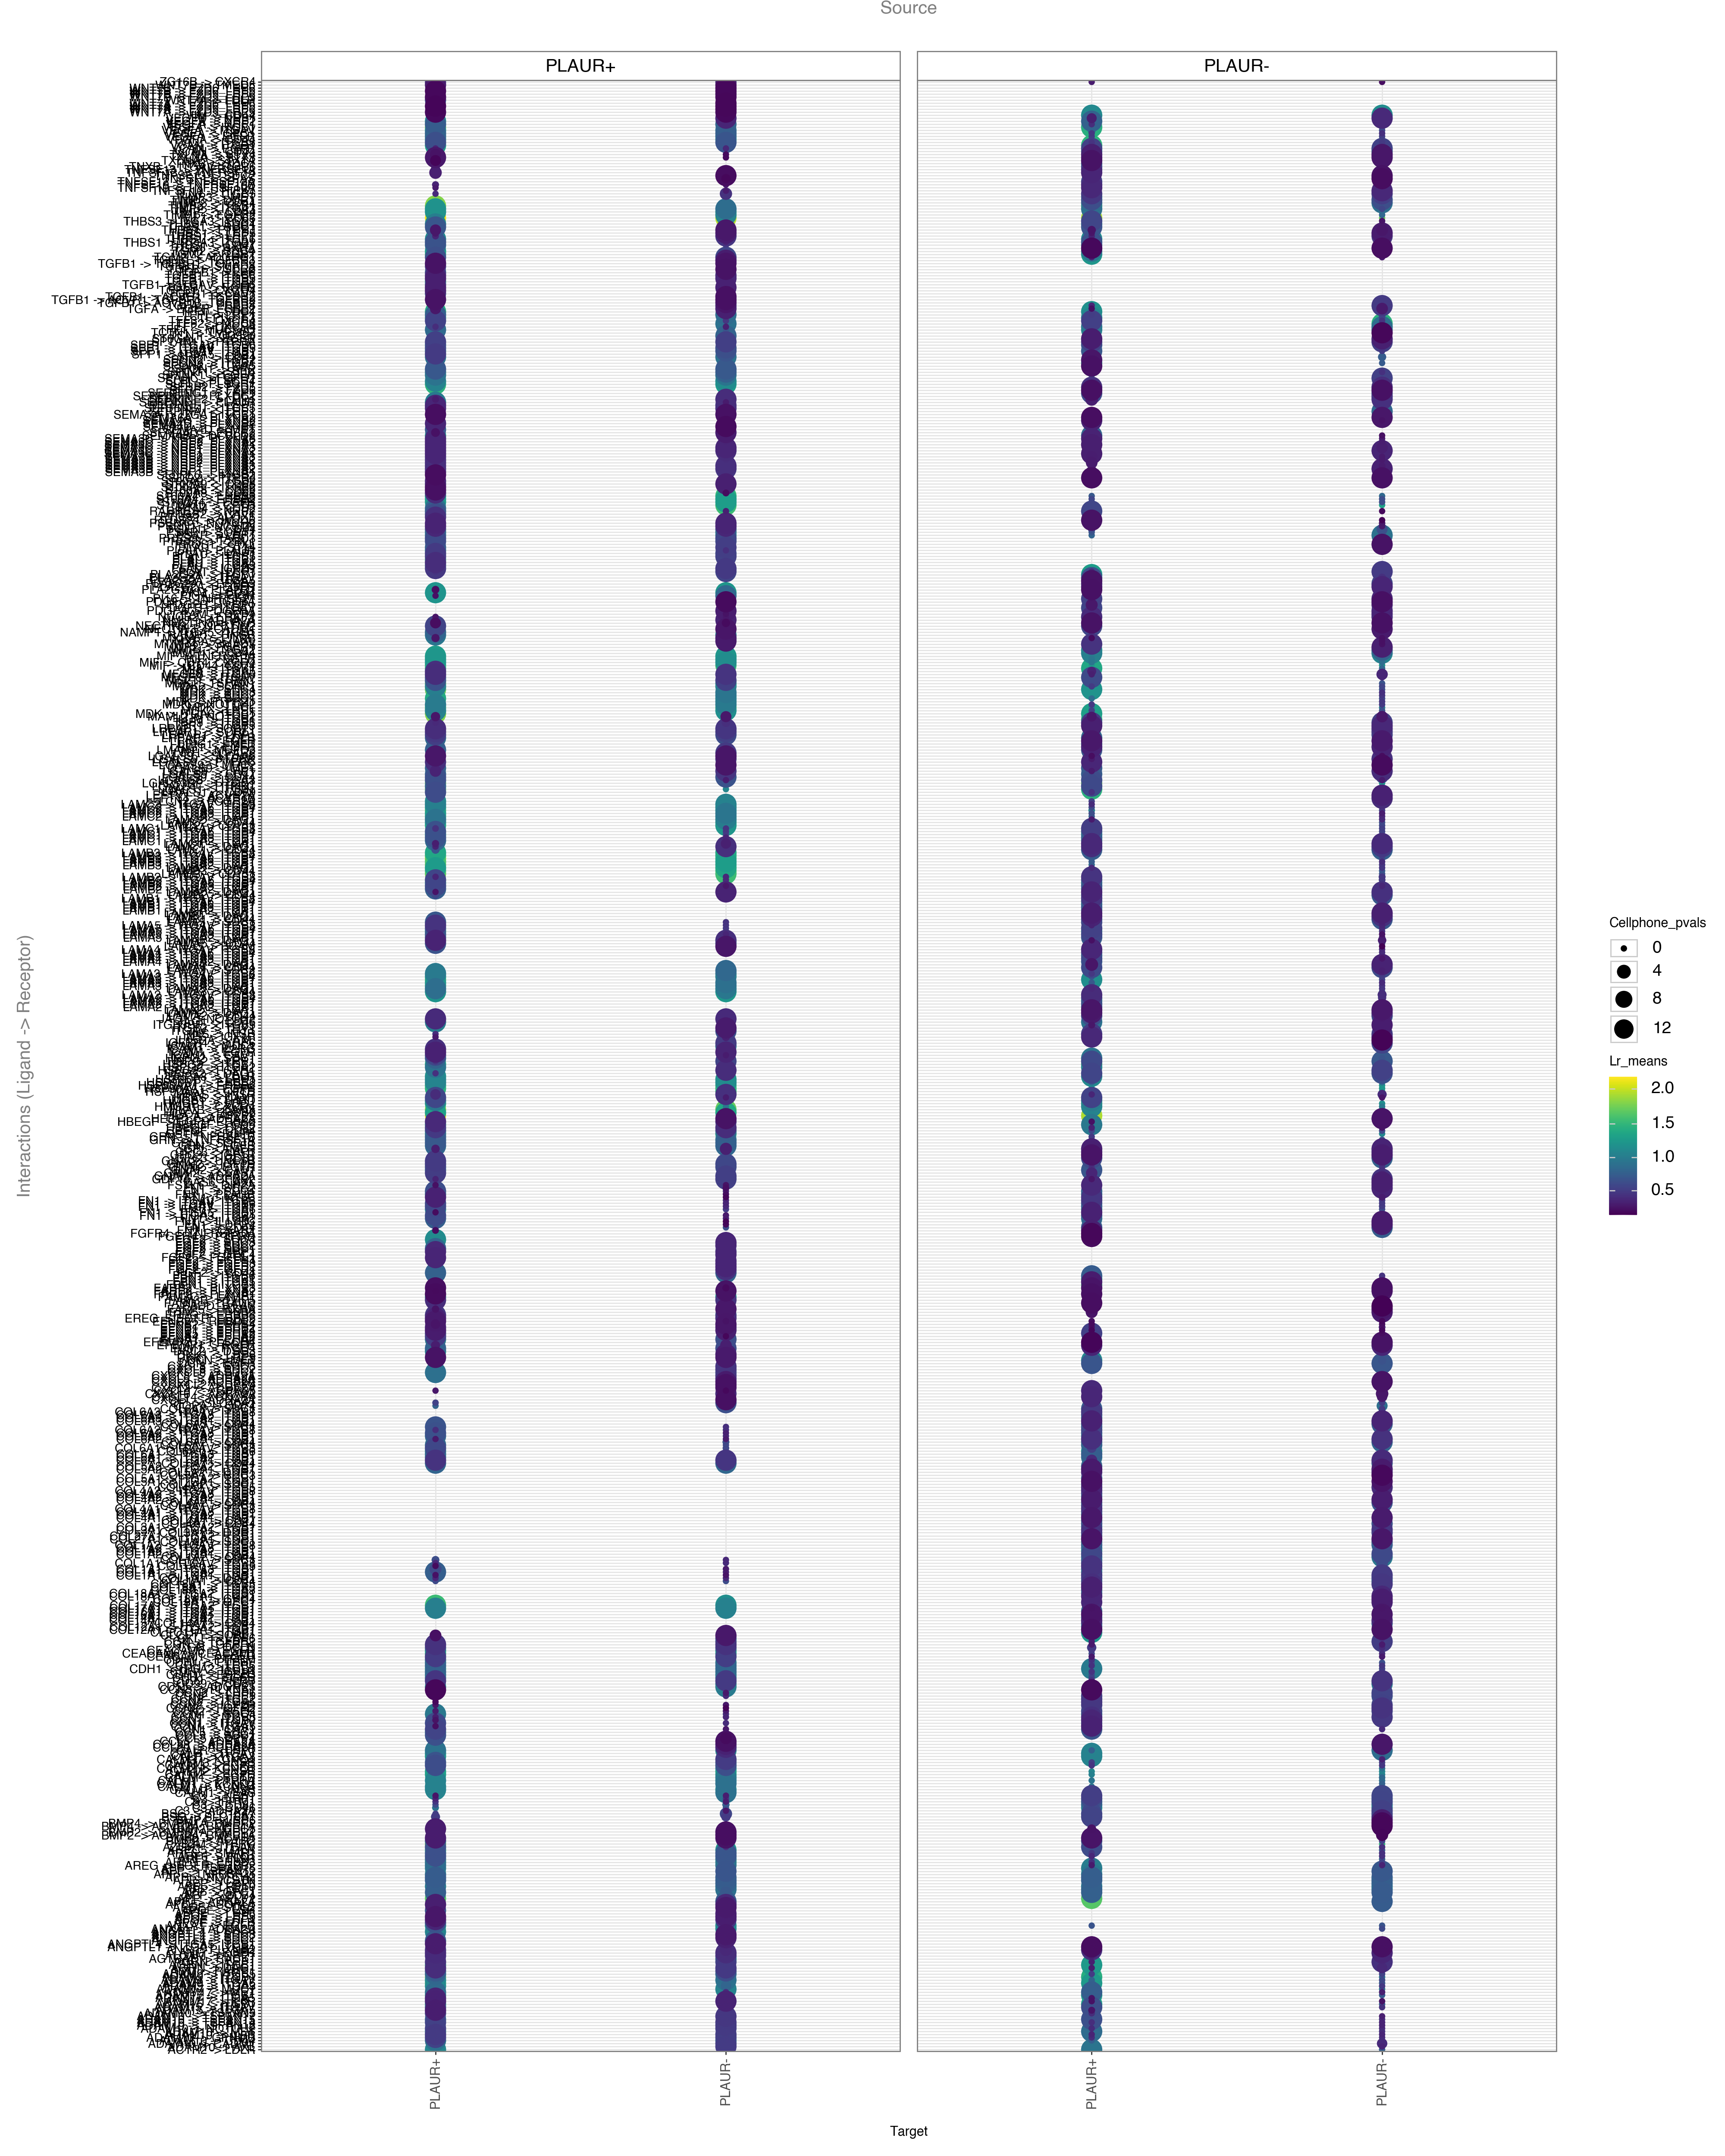

In [228]:
# Generate a dotplot for significant ligand-receptor interactions with adjusted spacing for clarity
dotplot(
    adata=combined_cells,
    colour='lr_means',                          # Color dots by the mean expression of ligand-receptor pairs
    size='cellphone_pvals',                      # Dot size based on p-values
    inverse_size=True,                           # Inverse p-values so that smaller p-values have larger dots
    source_labels=list(cpdb_res_df_per['source'].unique()),    # Source cell type labels
    target_labels= list(cpdb_res_df_per['target'].unique()),     # Target cell type labels
    figure_size=(20, 25),                        # Increased figure size for better spacing
    uns_key='cpdb_res',                          # Key in `adata.uns` where CellPhoneDB results are stored
    filterby='cellphone_pvals',                  # Filter by p-values column
    filter_lambda=lambda x: x <= 0.05,           # Show only interactions with p-values <= 0.05
                            
)
